# 📊 EDA – Análise Exploratória de Dados
## Contextualização
Este projeto visa desenvolver um sistema inteligente para detecção de defeitos em chapas de aço inoxidável com base em atributos extraídos de imagens. O sistema será treinado com dados que representam medições geométricas e estatísticas de possíveis defeitos, com o objetivo de classificar corretamente o tipo de falha e apoiar a automação do controle de qualidade industrial.

## 🔹 Carregamento e Diagnóstico Inicial

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler  
from sklearn.decomposition import PCA  
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier  
from lazypredict.Supervised import LazyClassifier  
from sklearn.metrics import (  
    classification_report,  
    confusion_matrix,  
    accuracy_score,  
    roc_auc_score,  
)


df_train = pd.read_csv(r"C:\Users\rosej\Videos\UNISENAI\bootcamp_train.csv")
df_test = pd.read_csv(r"C:\Users\rosej\Videos\UNISENAI\bootcamp_test.csv")

## 🔹 Verificações

In [205]:
df_train.columns

Index(['id', 'x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'peso_da_placa',
       'area_pixels', 'perimetro_x', 'perimetro_y', 'soma_da_luminosidade',
       'maximo_da_luminosidade', 'comprimento_do_transportador',
       'tipo_do_aço_A300', 'tipo_do_aço_A400', 'espessura_da_chapa_de_aço',
       'temperatura', 'index_de_bordas', 'index_vazio', 'index_quadrado',
       'index_externo_x', 'indice_de_bordas_x', 'indice_de_bordas_y',
       'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_global_externo',
       'log_das_areas', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao',
       'indice_de_luminosidade', 'sigmoide_das_areas',
       'minimo_da_luminosidade', 'falha_1', 'falha_2', 'falha_3', 'falha_4',
       'falha_5', 'falha_6', 'falha_outros'],
      dtype='object')

In [206]:
df_test.columns

Index(['id', 'x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'peso_da_placa',
       'area_pixels', 'perimetro_x', 'perimetro_y', 'soma_da_luminosidade',
       'maximo_da_luminosidade', 'comprimento_do_transportador',
       'tipo_do_aço_A300', 'tipo_do_aço_A400', 'espessura_da_chapa_de_aço',
       'temperatura', 'index_de_bordas', 'index_vazio', 'index_quadrado',
       'index_externo_x', 'indice_de_bordas_x', 'indice_de_bordas_y',
       'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_global_externo',
       'log_das_areas', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao',
       'indice_de_luminosidade', 'sigmoide_das_areas',
       'minimo_da_luminosidade'],
      dtype='object')

In [207]:
df_train.head().T

,0,1,2,3,4
id,0,1,2,3,4
x_minimo,154,1121,41,129,436
x_maximo,169.00,-186.00,216.00,157.00,442.00
y_minimo,260124,1789332,2708878,86408,4959398
y_maximo,260136,1789337,2708939,86427,530985
peso_da_placa,100,100,100,100,100
area_pixels,75,-206,6298,276,63
perimetro_x,27,9,275,39,17
perimetro_y,17,-194,134,26,17
soma_da_luminosidade,9948.00,2240.00,654634.00,33858.00,6374.00


In [208]:
print(df_train.shape)
print(df_test.shape)

(3390, 39)
(389, 32)


In [209]:
#Amostras duplicadas
df_train.duplicated().sum()

0

In [210]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float64
 11  comprimento_do_transportador  3390 non-null   int64  
 12  tipo_do_aço_A300              3390 non-null   object 
 13  tip

In [211]:
df_train.describe()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_variacao_x,indice_de_variacao_y,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade
count,3390.00,3390.00,3334.00,3390.00,3390.00,3390.00,3390.00,3390.00,3390.00,3290.00,...,3390.00,3390.00,3331.00,3390.00,3390.00,3390.00,3390.00,3340.00,3390.00,3390.00
mean,1694.50,995.51,605.90,2692639.62,1592301.39,100.00,1566.32,66.73,47.26,193107.87,...,0.08,0.19,0.59,2.48,1.32,1.40,0.10,-0.13,0.57,171.76
std,978.75,1796.74,548.08,5625692.78,1821345.27,0.00,4337.68,195.09,336.79,454996.51,...,0.38,0.47,0.48,0.77,0.48,0.43,0.49,0.13,0.34,272.95
min,0.00,-11.00,-186.00,-20.00,-166.00,100.00,-206.00,-229.00,-194.00,255.00,...,-0.91,-1.22,0.00,0.30,0.30,0.00,-0.99,-0.86,0.12,0.00
25%,847.25,41.00,179.00,393435.25,340738.00,100.00,68.00,12.00,11.00,9514.50,...,-0.17,-0.14,0.00,1.93,1.00,1.08,-0.29,-0.19,0.25,71.00
50%,1694.50,614.00,544.00,1265462.50,1128297.00,100.00,142.00,22.00,21.00,17836.00,...,0.05,0.12,1.00,2.23,1.15,1.32,0.11,-0.14,0.47,93.00
75%,2541.75,1187.50,1090.00,2555025.00,2184335.00,100.00,524.75,58.00,56.00,67978.00,...,0.26,0.45,1.00,2.83,1.48,1.72,0.53,-0.08,1.00,111.00
max,3389.00,15266.00,1713.00,104136555.00,12917094.00,100.00,152655.00,1275.00,18152.00,11591414.00,...,2.16,1.94,1.00,5.18,3.07,4.26,0.99,0.59,1.00,2086.00


In [212]:
# Visão geral: nulos, únicos e não nulos
summary = pd.DataFrame({
    'nulos': df_train.isnull().sum(),
    'não_nulos': df_train.notnull().sum(),
    'valores_únicos': df_train.nunique(),
    'tipo_dado': df_train.dtypes
})

summary = summary.sort_values(by='nulos', ascending=False)
print(summary)


                              nulos  não_nulos  valores_únicos tipo_dado
soma_da_luminosidade            100       3290            1783   float64
maximo_da_luminosidade           98       3292              91   float64
tipo_do_aço_A400                 76       3314               8    object
indice_global_externo            59       3331               3   float64
x_maximo                         56       3334             945   float64
indice_de_luminosidade           50       3340            1476   float64
espessura_da_chapa_de_aço        41       3349              24   float64
index_quadrado                   36       3354             745   float64
log_das_areas                     0       3390             862   float64
log_indice_x                      0       3390             177   float64
log_indice_y                      0       3390             215   float64
indice_de_orientaçao              0       3390             943   float64
id                                0       3390     

In [213]:
df_train.isna().sum()[df_train.isna().sum() > 0]


x_maximo                      56
soma_da_luminosidade         100
maximo_da_luminosidade        98
tipo_do_aço_A400              76
espessura_da_chapa_de_aço     41
index_quadrado                36
indice_global_externo         59
indice_de_luminosidade        50
dtype: int64

In [214]:
df_test.isna().sum()[df_test.isna().sum() > 0]

Series([], dtype: int64)

In [215]:
# classificar as colunas 
def classificar_colunas(df_train, limite_binario=2, limite_categorico=10):
    tipos = []
    
    for col in df_train.columns:
        nulos = df_train[col].isnull().sum()
        n_unique = df_train[col].nunique()
        dtype = df_train[col].dtype

        if pd.api.types.is_numeric_dtype(df_train[col]):
            if n_unique == limite_binario:
                tipo = 'binária'
            elif n_unique <= limite_categorico:
                tipo = 'categórica numérica'
            else:
                tipo = 'contínua'
        elif pd.api.types.is_string_dtype(df_train[col]):
            if n_unique <= limite_categorico:
                tipo = 'categórica'
            else:
                tipo = 'texto livre'
        else:
            tipo = 'outro'

        tipos.append({
            'coluna': col,
            'nulos': nulos,
            'únicos': n_unique,
            'dtype': dtype,
            'classificação': tipo
        })

    return pd.DataFrame(tipos).sort_values(by='nulos', ascending=False)

# Aplicando
resumo_tipos = classificar_colunas(df_train)
print(resumo_tipos)


                          coluna  nulos  únicos    dtype        classificação
9           soma_da_luminosidade    100    1783  float64             contínua
10        maximo_da_luminosidade     98      91  float64             contínua
13              tipo_do_aço_A400     76       8   object                outro
24         indice_global_externo     59       3  float64  categórica numérica
2                       x_maximo     56     945  float64             contínua
29        indice_de_luminosidade     50    1476  float64             contínua
14     espessura_da_chapa_de_aço     41      24  float64             contínua
18                index_quadrado     36     745  float64             contínua
25                 log_das_areas      0     862  float64             contínua
26                  log_indice_x      0     177  float64             contínua
27                  log_indice_y      0     215  float64             contínua
28          indice_de_orientaçao      0     943  float64        

In [216]:
# Substituir valores nulos com a mediana (de df_train) nas duas bases
colunas_mediana = [
    'x_maximo', 'soma_da_luminosidade', 'maximo_da_luminosidade',
    'espessura_da_chapa_de_aço', 'index_quadrado',
    'indice_global_externo', 'indice_de_luminosidade'
]

for col in colunas_mediana:
    mediana = df_train[col].median()  # ⚠️ usamos a mediana do TREINO
    df_train[col].fillna(mediana, inplace=True)
    df_test[col].fillna(mediana, inplace=True)

# Verificação final
print("Nulos restantes no df_train:")
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

print("\nNulos restantes no df_test:")
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])



Nulos restantes no df_train:
tipo_do_aço_A400    76
dtype: int64

Nulos restantes no df_test:
Series([], dtype: int64)


In [217]:
# Função para exibir valores únicos e dtype para ambas as bases
def exibir_valores_unicos_tipo_aco(df, nome_conjunto):
    print(f"\n{nome_conjunto.upper()}:")

    for col in ['tipo_do_aço_A300', 'tipo_do_aço_A400']:
        print(f"\nValores únicos em '{col}':")
        print(df[col].unique())
        print("dtype:", df[col].dtype)

# Aplicar para df_train e df_test
exibir_valores_unicos_tipo_aco(df_train, "df_train")
exibir_valores_unicos_tipo_aco(df_test, "df_test")



DF_TRAIN:

Valores únicos em 'tipo_do_aço_A300':
['Não' 'não' '1' 'Sim' 'sim' '0' 'N' '-']
dtype: object

Valores únicos em 'tipo_do_aço_A400':
['sim' 'Sim' 'Não' 'não' nan '1' '0' 'S' 'nao']
dtype: object

DF_TEST:

Valores únicos em 'tipo_do_aço_A300':
[1 0]
dtype: int64

Valores únicos em 'tipo_do_aço_A400':
[0 1]
dtype: int64


In [218]:
# Substituições padronizadas para valores de tipo de aço
substituicoes = {
    'sim': 1, 'Sim': 1, 'SIM': 1, 'S': 1, 1: 1,
    'não': 0, 'Nao': 0, 'NAO': 0, 'Não': 0, 'N': 0, 0: 0
}

for df in [df_train, df_test]:
    for col in ['tipo_do_aço_A300', 'tipo_do_aço_A400']:
        df[col] = df[col].replace(substituicoes)
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Garante conversão


In [219]:
def print_valores_unicos_tipo_aco(df, nome):
    print(f"\n{nome.upper()}:")

    print("Valores únicos em tipo_do_aço_A300:")
    print(df['tipo_do_aço_A300'].unique())

    print("\nValores únicos em tipo_do_aço_A400:")
    print(df['tipo_do_aço_A400'].unique())

# Aplicar nos dois conjuntos
print_valores_unicos_tipo_aco(df_train, "df_train")
print_valores_unicos_tipo_aco(df_test, "df_test")



DF_TRAIN:
Valores únicos em tipo_do_aço_A300:
[ 0.  1. nan]

Valores únicos em tipo_do_aço_A400:
[ 1.  0. nan]

DF_TEST:
Valores únicos em tipo_do_aço_A300:
[1 0]

Valores únicos em tipo_do_aço_A400:
[0 1]


In [220]:
# verificar as linhas em que a coluna 'tipo_do_aço_A300' está com valor ausente (NaN) 
# e mostrar também o valor correspondente de 'tipo_do_aço_A400'

print("Linhas com 'tipo_do_aço_A300' ausente em df_train:")
print(df_train[df_train['tipo_do_aço_A300'].isna()][['tipo_do_aço_A300', 'tipo_do_aço_A400']])

print("\nLinhas com 'tipo_do_aço_A300' ausente em df_test:")
print(df_test[df_test['tipo_do_aço_A300'].isna()][['tipo_do_aço_A300', 'tipo_do_aço_A400']])


Linhas com 'tipo_do_aço_A300' ausente em df_train:
      tipo_do_aço_A300  tipo_do_aço_A400
403                NaN              1.00
1489               NaN              0.00
1745               NaN              1.00
2387               NaN              0.00
3000               NaN              1.00
3185               NaN              1.00

Linhas com 'tipo_do_aço_A300' ausente em df_test:
Empty DataFrame
Columns: [tipo_do_aço_A300, tipo_do_aço_A400]
Index: []


In [221]:
# Preencher valores ausentes usando o complemento da outra coluna
for df in [df_train, df_test]:
    df.loc[df['tipo_do_aço_A300'].isna(), 'tipo_do_aço_A300'] = 1 - df['tipo_do_aço_A400']
    df.loc[df['tipo_do_aço_A400'].isna(), 'tipo_do_aço_A400'] = 1 - df['tipo_do_aço_A300']


In [222]:
def print_valores_unicos_tipo_aco(df, nome):
    print(f"\n{nome.upper()}:")

    print("Valores únicos em tipo_do_aço_A300:")
    print(df['tipo_do_aço_A300'].unique())

    print("\nValores únicos em tipo_do_aço_A400:")
    print(df['tipo_do_aço_A400'].unique())

# Aplicar nos dois conjuntos
print_valores_unicos_tipo_aco(df_train, "df_train")
print_valores_unicos_tipo_aco(df_test, "df_test")



DF_TRAIN:
Valores únicos em tipo_do_aço_A300:
[0. 1.]

Valores únicos em tipo_do_aço_A400:
[1. 0.]

DF_TEST:
Valores únicos em tipo_do_aço_A300:
[1 0]

Valores únicos em tipo_do_aço_A400:
[0 1]


In [223]:
# Verificar se ainda restaram valores nulos
print("Nulos restantes em df_train:")
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

print("\nNulos restantes em df_test:")
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])

Nulos restantes em df_train:
Series([], dtype: int64)

Nulos restantes em df_test:
Series([], dtype: int64)


## Analisar colunas target

In [224]:
# 1. Identificar colunas de falha (válido para ambos)
target_cols = [col for col in df_train.columns if col.startswith("falha_")]
print("Colunas de target:", target_cols)


Colunas de target: ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']


In [225]:
df_test.head()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_variacao_x,indice_de_variacao_y,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade
0,3390,1117,1154,1194359,1194414,100,1055,69,56,110262,...,0.06,-0.13,1.00,3.02,1.57,1.74,0.33,-0.18,1.00,72
1,3391,1572,1610,337559,337645,100,1570,176,128,128770,...,-0.64,0.17,1.00,3.20,1.58,1.93,0.56,-0.36,1.00,29
2,3392,1617,1628,2095494,2095507,100,89,14,13,7804,...,0.36,0.60,1.00,1.95,1.04,1.11,0.15,-0.32,0.26,77
3,3393,1317,1324,2166062,2166078,100,78,12,16,9381,...,-0.09,-0.08,1.00,1.89,0.85,1.20,0.56,-0.06,0.22,110
4,3394,386,394,1304617,1304626,100,51,10,9,5795,...,-0.02,0.38,1.00,1.71,0.90,0.95,0.11,-0.11,0.18,100


In [226]:
# 2. Verificar valores únicos antes da limpeza, em df_train

def verificar_valores_unicos_targets(df, nome):
    print(f"\nValores únicos por coluna em {nome.upper()}:")
    for col in target_cols:
        print(f"{col}: {df[col].unique()}")

verificar_valores_unicos_targets(df_train, "df_train")


Valores únicos por coluna em DF_TRAIN:
falha_1: ['False' '0' '1' 'True' 'nao' 'S']
falha_2: ['0' 'False' 'True' 'y' '1' 'S']
falha_3: [False  True]
falha_4: ['False' 'True' 'nao' '0' 'S' '1']
falha_5: ['não' 'Não' 'Sim' 'sim']
falha_6: [False  True]
falha_outros: ['Sim' 'Não']


In [227]:
# 3. Padronizar os valores das colunas de falha para 0 e 1
substituicoes_target = {
    'Sim': 1, 'sim': 1, 'S': 1, True: 1, 'True': 1,
    'Não': 0, 'não': 0, 'Nao': 0, 'NAO': 0, 'N': 0, False: 0, 'False': 0
}

for df in [df_train]:
    for col in target_cols:
        df[col] = df[col].replace(substituicoes_target)
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [228]:
# Padronização das colunas de falha em df_train
for df in [df_train]:
    for col in target_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # converte texto para número
        df[col] = df[col].fillna(0)                        # trata valores ausentes
        df[col] = df[col].astype(int)                      # garante tipo int (0 ou 1)

# Verificar se a padronização foi bem-sucedida
def verificar_targets_binarios(df, nome):
    print(f"\nVerificação em {nome.upper()}:")
    for col in target_cols:
        print(f"{col}: {df[col].unique()}")

verificar_targets_binarios(df_train, "df_train")


Verificação em DF_TRAIN:
falha_1: [0 1]
falha_2: [0 1]
falha_3: [0 1]
falha_4: [0 1]
falha_5: [0 1]
falha_6: [0 1]
falha_outros: [1 0]


In [229]:
# Verificar os valores únicos de cada coluna de falha
def mostrar_valores_unicos(df, nome):
    print(f"\n Valores únicos em {nome.upper()}:")
    for col in target_cols:
        print(f"{col}: {df[col].unique()}")

mostrar_valores_unicos(df_train, "df_train")


 Valores únicos em DF_TRAIN:
falha_1: [0 1]
falha_2: [0 1]
falha_3: [0 1]
falha_4: [0 1]
falha_5: [0 1]
falha_6: [0 1]
falha_outros: [1 0]


In [230]:
# Targets_bin atualizado com os valores limpos para treino
targets_bin_train = df_train[target_cols]

'targets_bin' é uma versão filtrada do df_train/test contendo apenas as colunas de falhas, onde os valores foram padronizados para binários (0 ou 1).

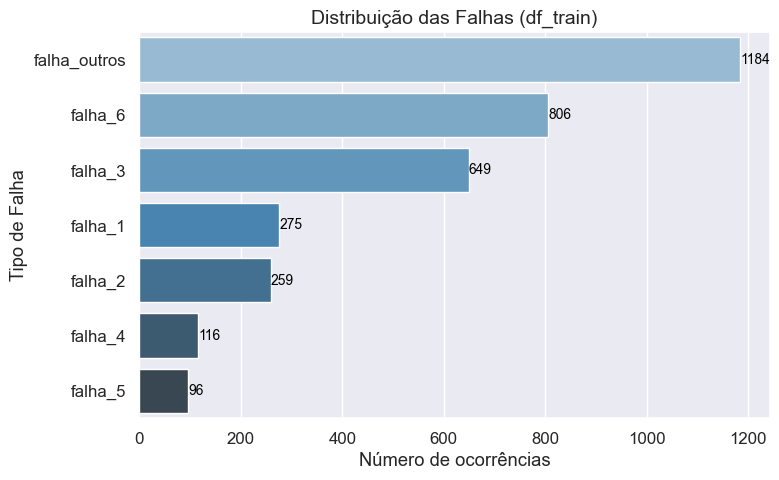

In [ ]:
# Contagem de cada tipo de falha
falha_counts = df_train[target_cols].sum().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=falha_counts.values, y=falha_counts.index, palette="Blues_d")
plt.title("Distribuição das Falhas (df_train)", fontsize=14)
plt.xlabel("Número de ocorrências")
plt.ylabel("Tipo de Falha")

# Adicionar os valores no topo das barras
for i, v in enumerate(falha_counts.values):
    ax.text(v + 0.5, i, str(int(v)), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()



In [232]:
# Encontrar amostras com exatamente 2 falhas no treino
duas_falhas_train = targets_bin_train[targets_bin_train.sum(axis=1) == 2]
print("Amostras com exatamente 2 falhas em df_train:")
print(duas_falhas_train)

Amostras com exatamente 2 falhas em df_train:
Empty DataFrame
Columns: [falha_1, falha_2, falha_3, falha_4, falha_5, falha_6, falha_outros]
Index: []


In [233]:
# Adiciona coluna 'n_falhas' para treino e teste
df_train['n_falhas'] = targets_bin_train.sum(axis=1)
df_test['n_falhas'] = targets_bin_test.sum(axis=1)

# Exibir distribuição das quantidades de falhas no treino
print("Contagem de n_falhas em df_train:")
print(df_train['n_falhas'].value_counts().sort_index())

# Exibir distribuição das quantidades de falhas no teste
print("\nContagem de n_falhas em df_test:")
print(df_test['n_falhas'].value_counts().sort_index())


Contagem de n_falhas em df_train:
n_falhas
0       5
1    3385
Name: count, dtype: int64

Contagem de n_falhas em df_test:
n_falhas
0      2
1    387
Name: count, dtype: int64


### Conclusão
Não há nenhuma amostra com exatamente 2 falhas no conjunto de dados — ou seja, nenhuma linha tem duas colunas de falha com valor 1 ao mesmo tempo.

## 🔹 Distribuição das Classes de Falha

Como estou tratando um problema de **classificação de defeitos em chapas de aço**. Meus dados originais possuem várias colunas de falha (falha_1, falha_2, ..., falha_outros), onde cada uma representa uma possível falha binária (0 ou 1).
Mas em modelos de classificação multiclasse espera-se ter apenas uma coluna *y'* com um valor por amostra, por isso a partir de agora tratarei as colunas falha como **classe_principal**.

In [234]:
# Criar a coluna 'classe_principal' com o nome da primeira falha ativa (valor 1) em cada linha
df_train['classe_principal'] = targets_bin_train.idxmax(axis=1)
df_test['classe_principal'] = targets_bin_test.idxmax(axis=1)

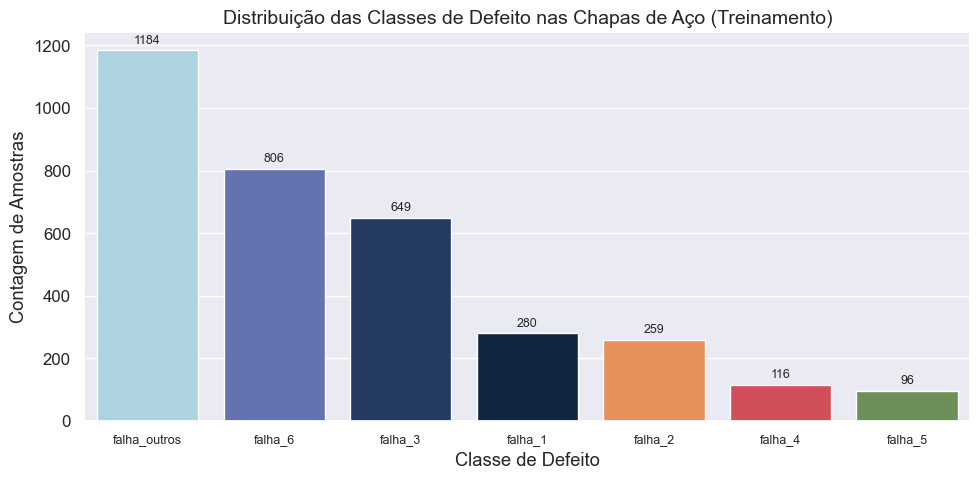

In [ ]:
# Lista personalizada de cores
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0B2447", "#FF8C42", "#E63946", "#6A994E"]
cmap_custom = ListedColormap(color_list)

# Gráfico da distribuição da classe principal no treino
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    x=df_train['classe_principal'],
    palette=color_list,
    order=df_train['classe_principal'].value_counts().index
)

# Ajustes visuais
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=9)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

plt.title('Distribuição das Classes de Defeito nas Chapas de Aço (Treinamento)', fontsize=14)
plt.xlabel('Classe de Defeito')
plt.ylabel('Contagem de Amostras')
plt.tight_layout()
plt.show()



In [236]:
# Distribuição percentual em df_train
print("Distribuição percentual da classe_principal no df_train:")
print(df_train['classe_principal'].value_counts(normalize=True).sort_index().apply(lambda x: f"{x:.2%}"))

# Distribuição percentual em df_test
print("\nDistribuição percentual da classe_principal no df_test:")
print(df_test['classe_principal'].value_counts(normalize=True).sort_index().apply(lambda x: f"{x:.2%}"))


Distribuição percentual da classe_principal no df_train:
classe_principal
falha_1          8.26%
falha_2          7.64%
falha_3         19.14%
falha_4          3.42%
falha_5          2.83%
falha_6         23.78%
falha_outros    34.93%
Name: proportion, dtype: object

Distribuição percentual da classe_principal no df_test:
classe_principal
falha_1          7.20%
falha_2         10.54%
falha_3         20.82%
falha_4          3.86%
falha_5          3.08%
falha_6         17.74%
falha_outros    36.76%
Name: proportion, dtype: object


### Verificar inconsistencias

In [237]:
# Verificar inconsistencias, se x_minimo sempre é menor que x_maximo
# Encontrar casos onde x_minimo >= x_maximo
inconsistencias = df[df['x_minimo'] >= df['x_maximo']]

# Visualizar as colunas relevantes dessas linhas
print(inconsistencias[['x_minimo', 'x_maximo']].head())


    x_minimo  x_maximo
1       1121   -186.00
5        -11   -186.00
9         41   -186.00
10       843   -186.00
14      5261    643.00


In [238]:
# Quantidade total de amostras inconsistentes
print(f"Total de inconsistências: {len(inconsistencias)}")


Total de inconsistências: 659


In [239]:
# Remover inconsistências de bounding box em x
df = df[df['x_minimo'] < df['x_maximo']]


In [240]:
# Verificar inconsistencias, se x_minimo sempre é menor que x_maximo
# Encontrar casos onde x_minimo >= x_maximo
inconsistencias = df[df['x_minimo'] >= df['x_maximo']]

# Visualizar as colunas relevantes dessas linhas
print(inconsistencias[['x_minimo', 'x_maximo']].head())

Empty DataFrame
Columns: [x_minimo, x_maximo]
Index: []


Foram identificados casos em que x_minimo > x_maximo (e o mesmo para y). Essa inversão contradiz a lógica geométrica esperada e pode prejudicar o aprendizado dos modelos. Por isso, os valores removidos para manter a consistência e garantir melhor desempenho na classificação.

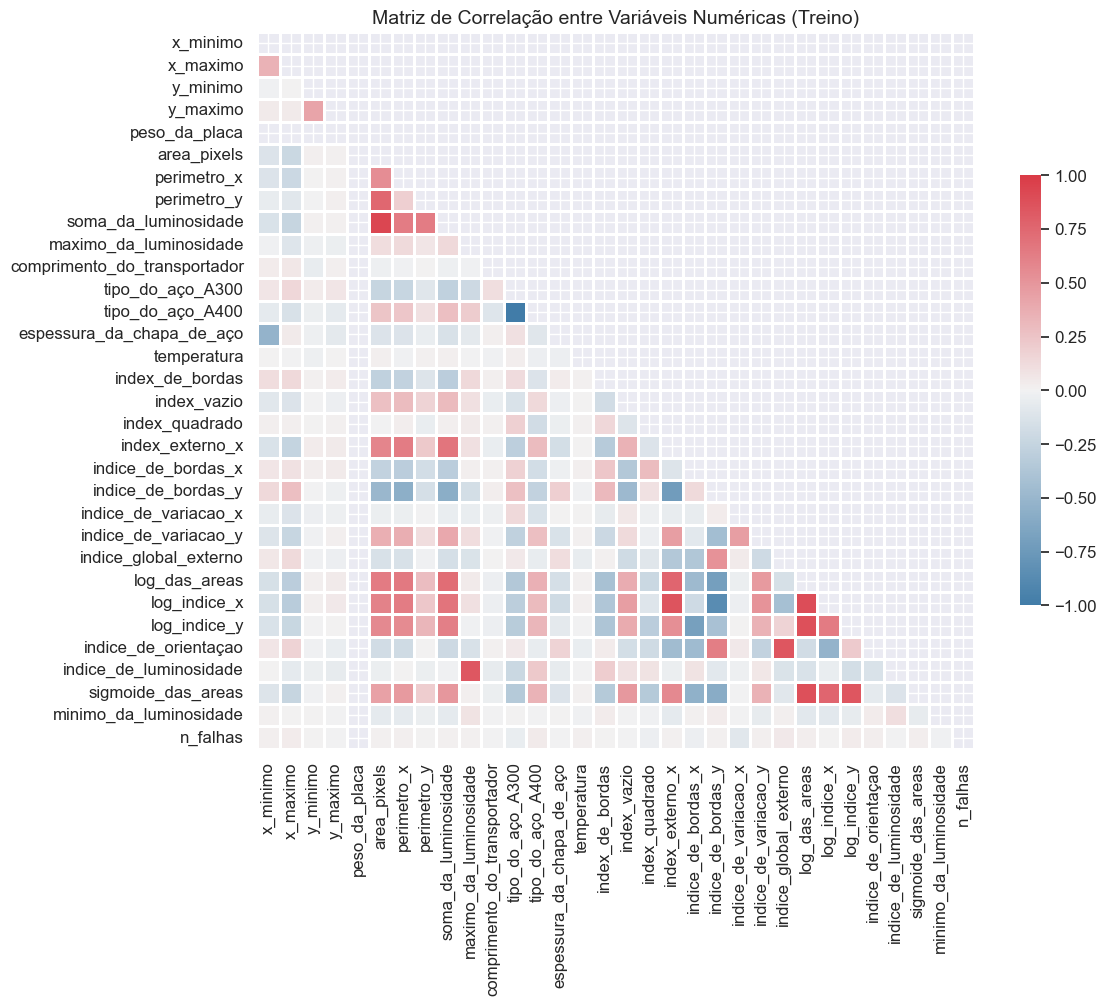

In [ ]:
# Selecionar apenas colunas numéricas (excluindo colunas de ID, targets e categóricas não binárias)
colunas_para_correlacao = df_train.select_dtypes(include=['int64', 'float64']).drop(columns=['id'], errors='ignore')

# Calcula a matriz de correlação
corr = colunas_para_correlacao.corr()

# Máscara para esconder a metade superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuração do gráfico
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.6}, annot=False)

plt.title('Matriz de Correlação entre Variáveis Numéricas (Treino)', fontsize=14)
plt.tight_layout()
plt.show()


A matriz mostra que há fortes correlações entre variáveis geométricas e de luminosidade, indicando possível redundância ou multicolinearidade entre atributos usados na predição.

### Tratamento de Outliers

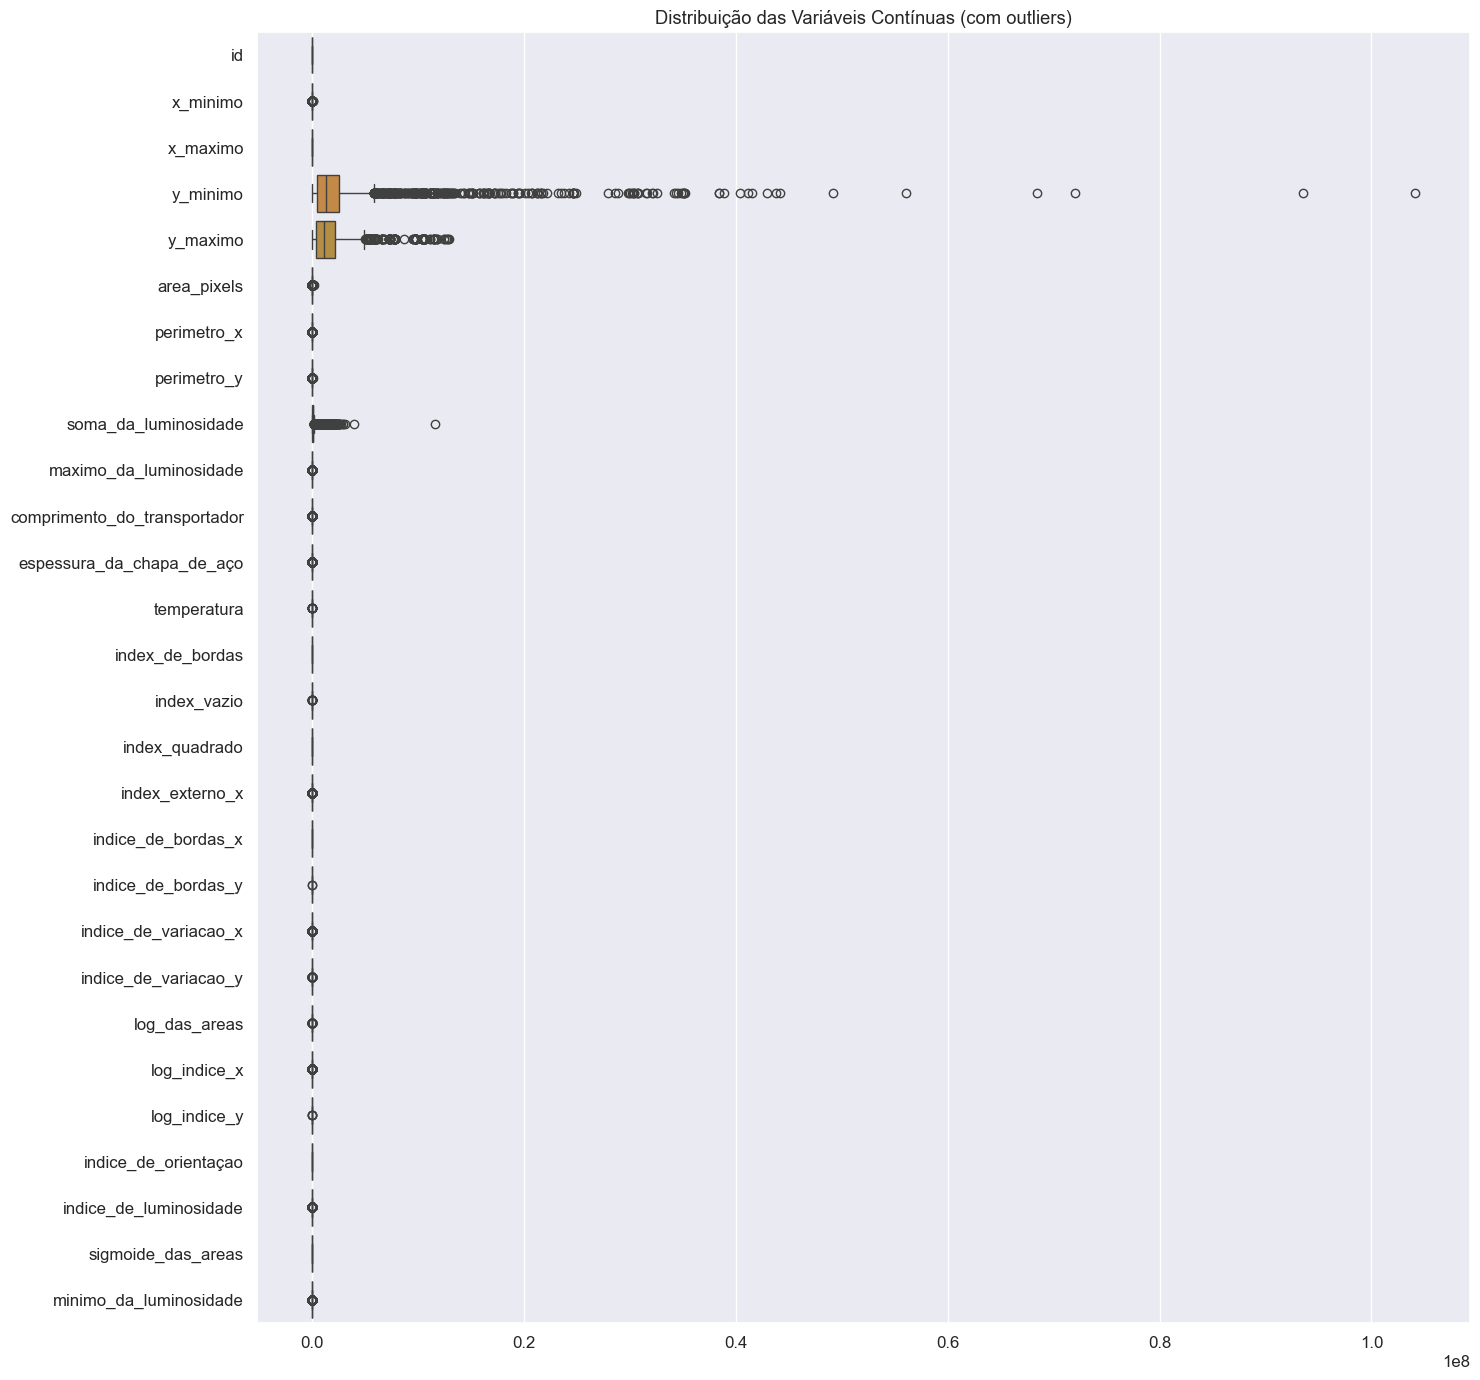

In [ ]:
# Verificando outliers

# 1. Detectar automaticamente as colunas contínuas (float ou int), excluindo colunas binárias
colunas_continuas = df_train.select_dtypes(include=['float64', 'int64']).columns
colunas_continuas = [col for col in colunas_continuas if df_train[col].nunique() > 10]

# 2. Plotar boxplots para visualizar outliers
plt.figure(figsize=(15, len(colunas_continuas) * 0.5))
sns.boxplot(data=df_train[colunas_continuas], orient="h")
plt.title("Distribuição das Variáveis Contínuas (com outliers)")
plt.tight_layout()
plt.show()



In [243]:
def contar_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    inferior = Q1 - 1.5 * IQR
    superior = Q3 + 1.5 * IQR
    return ((df[col] < inferior) | (df[col] > superior)).sum()

# Aplicar em todas as colunas numéricas
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
outliers_por_coluna = {col: contar_outliers_iqr(df, col) for col in colunas_numericas}

# Converter para DataFrame e ordenar
outliers_df = pd.DataFrame.from_dict(outliers_por_coluna, orient='index', columns=['n_outliers'])
outliers_df = outliers_df.sort_values(by='n_outliers', ascending=False)

In [244]:
top_outliers = outliers_df.head(10).index.tolist()

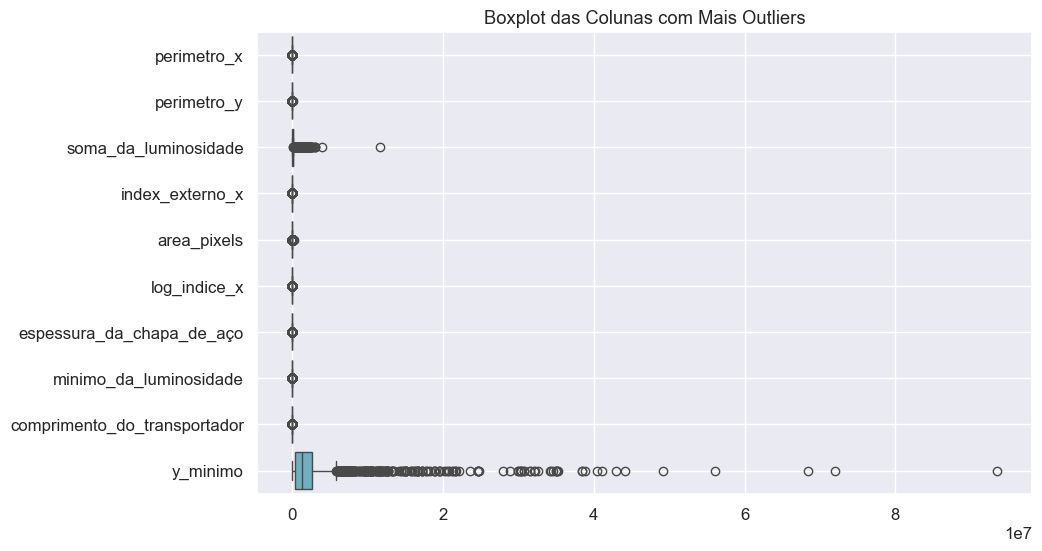

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[top_outliers], orient='h')
plt.title('Boxplot das Colunas com Mais Outliers')
plt.grid(True)
plt.show()

In [246]:
# Criar uma cópia do dataset original
df_limpo = df_train.copy()

# Lista das colunas com mais outliers
colunas_com_mais_outliers = [
    'y_minimo', 'soma_da_luminosidade', 'comprimento_do_transportador',
    'espessura_da_chapa_de_aço', 'minimo_da_luminosidade',
    'area_pixels', 'perimetro_y', 'perimetro_x',
    'log_indice_x', 'index_externo_x'
]

# Criar uma máscara booleana inicial com todos True
mascara = pd.Series(True, index=df_limpo.index)

# Atualizar a máscara apenas para os valores dentro do limite de 99% em cada coluna
for col in colunas_com_mais_outliers:
    limite_superior = df_limpo[col].quantile(0.99)
    mascara &= df_limpo[col] <= limite_superior

# Aplicar a máscara ao DataFrame
df_limpo = df_limpo[mascara]

# Exibir resultado da filtragem
print(f"Amostras removidas: {len(df_train) - len(df_limpo)}")
print(f"Amostras restantes: {len(df_limpo)}")

Amostras removidas: 170
Amostras restantes: 3220


## 🔹 Estatísticas Descritivas e Boxplots

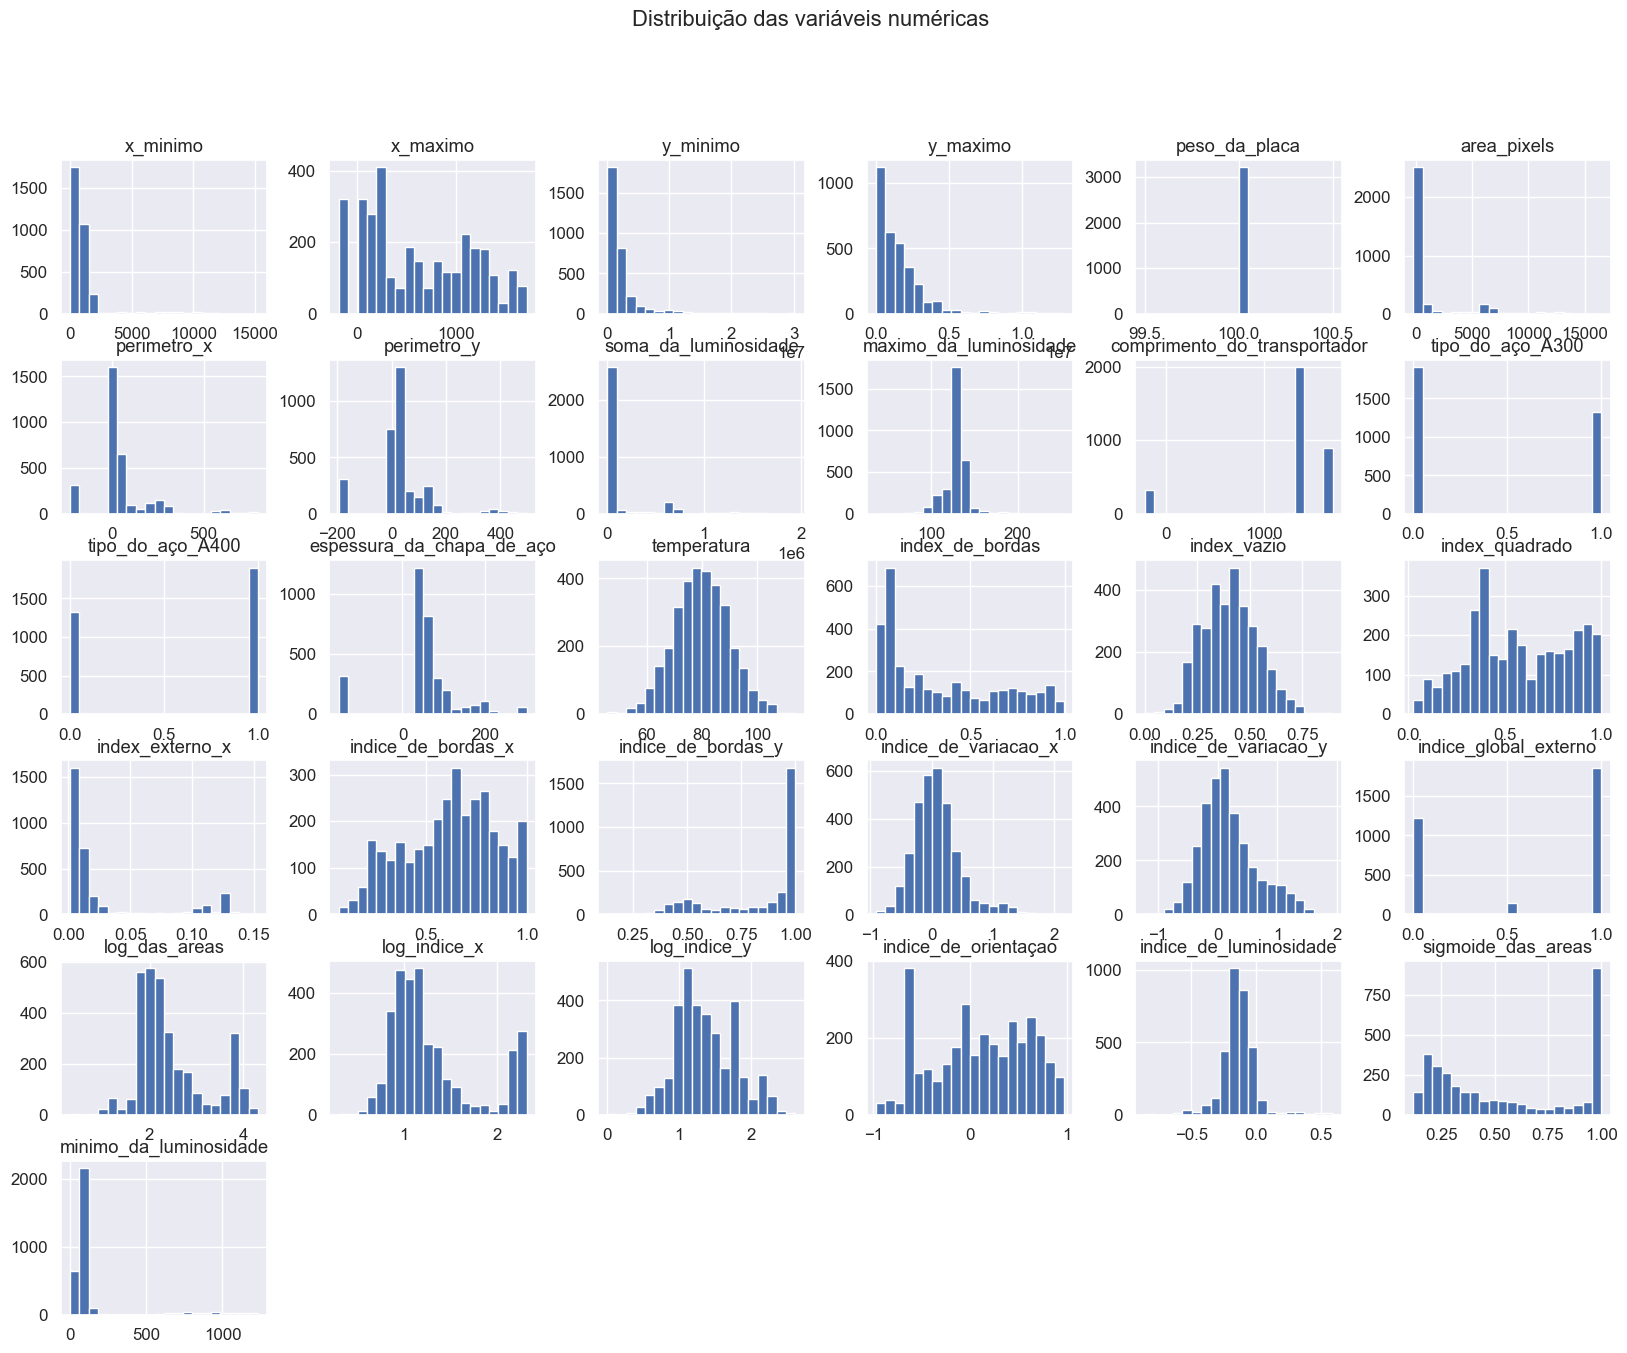

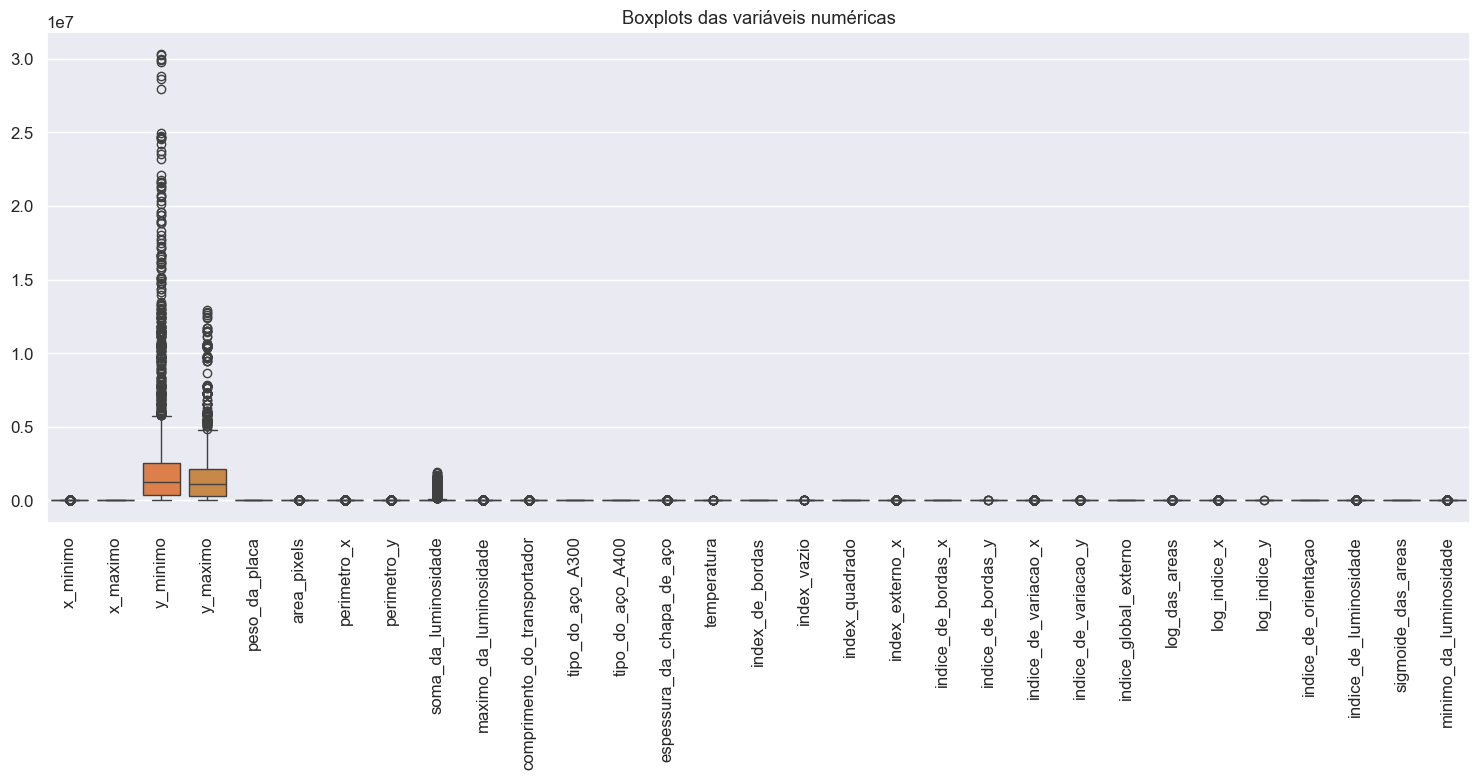

In [ ]:
# Corrigir a definição de variáveis numéricas
falhas = [col for col in df_limpo.columns if 'falha' in col]
variaveis_numericas = df_limpo.drop(columns=falhas + ['id']).select_dtypes(include='number').columns

# Histograma
df_limpo[variaveis_numericas].hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribuição das variáveis numéricas')
plt.show()

# Boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_limpo[variaveis_numericas])
plt.xticks(rotation=90)
plt.title('Boxplots das variáveis numéricas')
plt.tight_layout()
plt.show()


## 🔹 Tipo de Aço e Classes de Falha

In [248]:
tipo_aço = ['tipo_do_aço_A300', 'tipo_do_aço_A400']

for tipo in tipo_aço:
    print(f"\nDistribuição de falhas por {tipo}:")
    tabela = df.groupby(tipo)[falhas].mean().T.round(3)
    display(tabela)



Distribuição de falhas por tipo_do_aço_A300:


tipo_do_aço_A300,0.00,1.00
falha_1,0.09,0.07
falha_2,0.02,0.17
falha_3,0.31,0.00
falha_4,0.06,0.01
falha_5,0.04,0.01
falha_6,0.13,0.39
falha_outros,0.35,0.35
n_falhas,1.00,1.00



Distribuição de falhas por tipo_do_aço_A400:


tipo_do_aço_A400,0.00,1.00
falha_1,0.07,0.09
falha_2,0.17,0.02
falha_3,0.00,0.31
falha_4,0.00,0.06
falha_5,0.01,0.04
falha_6,0.39,0.13
falha_outros,0.35,0.35
n_falhas,1.00,1.00


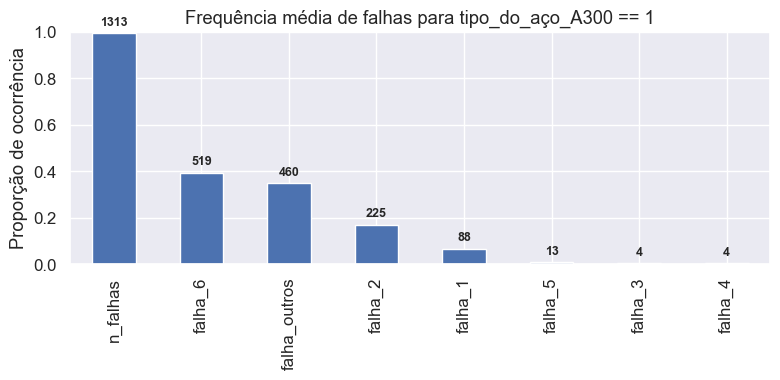

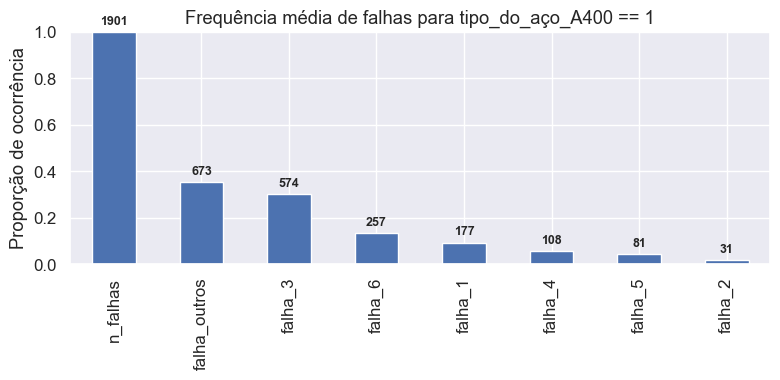

In [ ]:
for tipo in tipo_aço:
    # Filtra apenas onde o tipo de aço está presente (== 1)
    df_filtrado = df_limpo[df_limpo[tipo] == 1]

    # Média (proporção) de falhas
    media_falhas = df_filtrado[falhas].mean()

    # Quantidade absoluta de falhas (soma dos 1s)
    qtd_falhas = df_filtrado[falhas].sum()

    # Plot
    ax = media_falhas.sort_values(ascending=False).plot(kind='bar', figsize=(8, 4), title=f'Frequência média de falhas para {tipo} == 1')
    plt.ylabel('Proporção de ocorrência')
    plt.ylim(0, 1)
    plt.grid(True)

    # Adicionar rótulos nas barras com a quantidade
    for i, val in enumerate(media_falhas.sort_values(ascending=False).index):
        qtd = qtd_falhas[val]
        proporcao = media_falhas[val]
        ax.text(i, proporcao + 0.02, f'{int(qtd)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

## 🔹 Modelagem

### PCA para Visualização de Clusters

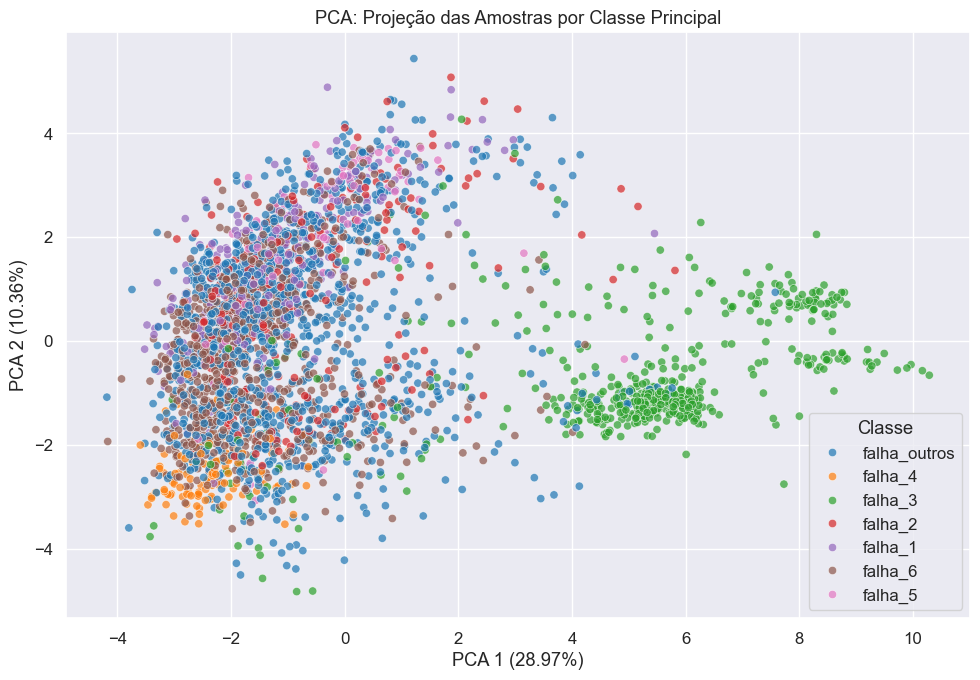

In [ ]:

# Selecionar variáveis numéricas (excluindo id, colunas de falha e classe)
falhas = [col for col in df_limpo.columns if 'falha' in col and col != 'classe_principal']
variaveis_numericas = df_limpo.drop(columns=falhas + ['id', 'classe_principal']).select_dtypes(include='number').columns

# Padronização
X = df_limpo[variaveis_numericas]
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Gráfico PCA colorido pela classe principal
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_limpo['classe_principal'],
    palette='tab10',
    alpha=0.7
)
plt.title('PCA: Projeção das Amostras por Classe Principal')
plt.xlabel(f'PCA 1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PCA 2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.legend(title='Classe')
plt.grid(True)
plt.tight_layout()
plt.show()



O PCA 1 explica aproximadamente 29% da variância dos dados.
O PCA 2 explica cerca de 10%, totalizando quase 40% da variabilidade explicada.
Algumas classes como falha_3 mostram uma distribuição mais separável, enquanto outras estão mais sobrepostas no espaço.

Melhores Parâmetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}


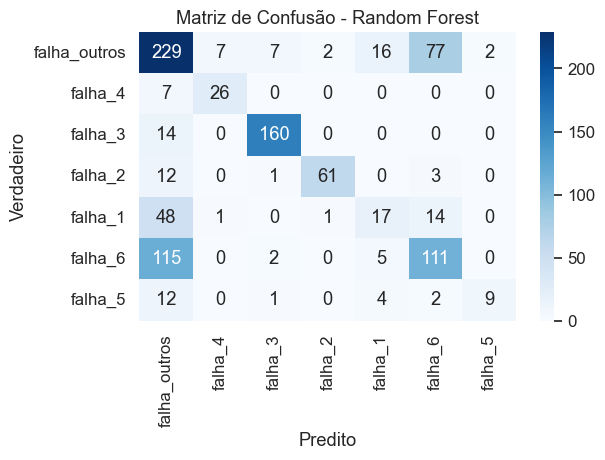


Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

     falha_1       0.40      0.21      0.28        81
     falha_2       0.95      0.79      0.87        77
     falha_3       0.94      0.92      0.93       174
     falha_4       0.76      0.79      0.78        33
     falha_5       0.82      0.32      0.46        28
     falha_6       0.54      0.48      0.50       233
falha_outros       0.52      0.67      0.59       340

    accuracy                           0.63       966
   macro avg       0.71      0.60      0.63       966
weighted avg       0.64      0.63      0.63       966


Acurácia do modelo (Random Forest): 63.46%


In [ ]:

# Dados
X = df_limpo.drop(columns=['id', 'classe_principal'] + falhas)
y = df_limpo['classe_principal']

# Escalonar
X_scaled = StandardScaler().fit_transform(X)

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Modelo e parâmetros
rf = RandomForestClassifier(n_estimators=200, random_state=42)
parameters = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 3, 10, 15],
    'max_depth': [None],
    'max_features': [None, 'sqrt', 'log2']
}

GSRF = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)
GSRF.fit(X_train, y_train)

# Avaliação
y_pred_rf = GSRF.predict(X_test)

print("Melhores Parâmetros:", GSRF.best_params_)

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_rf, labels=y.unique())
sns.heatmap(cm, annot=True, fmt='d', xticklabels=y.unique(), yticklabels=y.unique(), cmap='Blues')
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

# Relatório de Classificação
print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Acurácia
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAcurácia do modelo (Random Forest): {acc_rf * 100:.2f}%")


In [252]:
# ==== PRé-processamento ====
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_limpo.drop(columns=['id', 'classe_principal'] + falhas)
y = df_limpo['classe_principal']

X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# ==== Logistic Regression ====
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

params_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2],
    'solver': ['liblinear']
}

lr = LogisticRegression(max_iter=1000)
gs_lr = GridSearchCV(lr, params_lr, cv=5, n_jobs=-1)
gs_lr.fit(X_train, y_train)
y_pred_lr = gs_lr.predict(X_test)
print("\nLogistic Regression:")
print("Melhores Parâmetros:", gs_lr.best_params_)
print("Acurácia:", round(accuracy_score(y_test, y_pred_lr)*100, 2), "%")
print(classification_report(y_test, y_pred_lr))

# ==== K Nearest Neighbors ====
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

params_knn = {
    'n_neighbors': np.arange(1, 60),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()
gs_knn = GridSearchCV(knn, params_knn, cv=5, n_jobs=-1)
gs_knn.fit(X_train, y_train)
y_pred_knn = gs_knn.predict(X_test)
print("\nK Nearest Neighbors:")
print("Melhores Parâmetros:", gs_knn.best_params_)
print("Acurácia:", round(accuracy_score(y_test, y_pred_knn)*100, 2), "%")
print(classification_report(y_test, y_pred_knn))

# ==== Naïve Bayes com PCA ====
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, stratify=y, random_state=42)

nb = GaussianNB()
nb.fit(X_train_pca, y_train_pca)
y_pred_nb = nb.predict(X_test_pca)
print("\nNaïve Bayes com PCA:")
print("Acurácia:", round(accuracy_score(y_test_pca, y_pred_nb)*100, 2), "%")
print(classification_report(y_test_pca, y_pred_nb))

# ==== Decision Tree ====
from sklearn.tree import DecisionTreeClassifier

params_dt = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 15],
    'max_depth': [None, 2],
    'min_samples_leaf': [1, 3, 10, 15],
    'max_features': [None, 'sqrt', 'log2']  # removido 'auto'
}

dt = DecisionTreeClassifier(random_state=42)
gs_dt = GridSearchCV(dt, params_dt, cv=5, n_jobs=-1)
gs_dt.fit(X_train, y_train)
y_pred_dt = gs_dt.predict(X_test)
print("\nDecision Tree:")
print("Melhores Parâmetros:", gs_dt.best_params_)
print("Acurácia:", round(accuracy_score(y_test, y_pred_dt)*100, 2), "%")
print(classification_report(y_test, y_pred_dt))

# ==== Random Forest ====
from sklearn.ensemble import RandomForestClassifier

params_rf = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 3, 10, 15],
    'max_depth': [None],
    'max_features': [None, 'sqrt', 'log2']
}

rf = RandomForestClassifier(n_estimators=200, random_state=42)
gs_rf = GridSearchCV(rf, params_rf, cv=5, n_jobs=-1)
gs_rf.fit(X_train, y_train)
y_pred_rf = gs_rf.predict(X_test)
print("\nRandom Forest:")
print("Melhores Parâmetros:", gs_rf.best_params_)
print("Acurácia:", round(accuracy_score(y_test, y_pred_rf)*100, 2), "%")
print(classification_report(y_test, y_pred_rf))



Logistic Regression:
Melhores Parâmetros: {'C': 5, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1}
Acurácia: 61.9 %
              precision    recall  f1-score   support

     falha_1       0.44      0.14      0.21        81
     falha_2       0.95      0.77      0.85        77
     falha_3       0.93      0.90      0.92       174
     falha_4       0.74      0.76      0.75        33
     falha_5       0.70      0.25      0.37        28
     falha_6       0.50      0.46      0.48       233
falha_outros       0.51      0.68      0.59       340

    accuracy                           0.62       966
   macro avg       0.68      0.56      0.59       966
weighted avg       0.63      0.62      0.61       966


K Nearest Neighbors:
Melhores Parâmetros: {'algorithm': 'auto', 'n_neighbors': 18, 'weights': 'distance'}
Acurácia: 60.56 %
              precision    recall  f1-score   support

     falha_1       0.40      0.15      0.22        81
     falha_2       0.88      0.66      0.76       

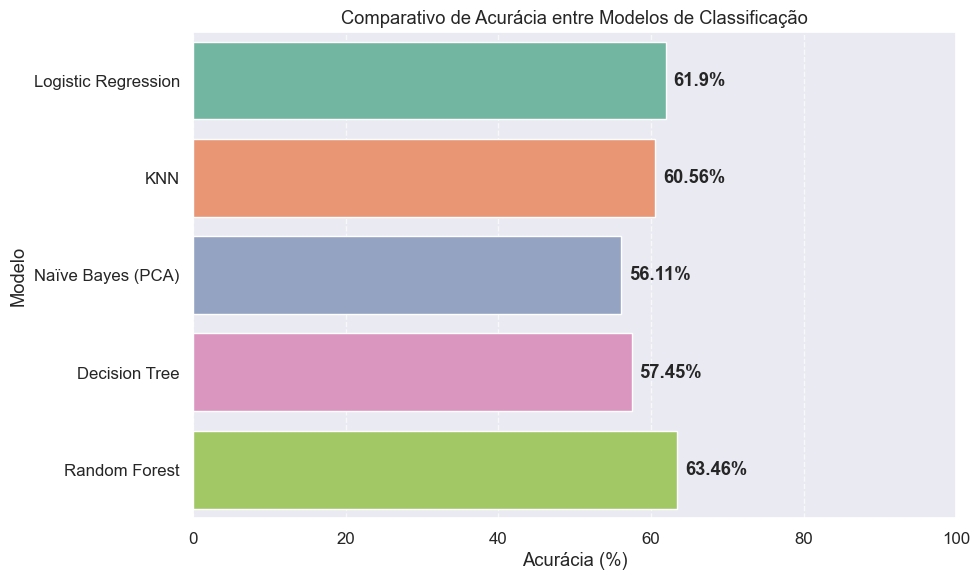

In [253]:
# Dicionário com acurácias
acuracias = {
    'Logistic Regression': round(accuracy_score(y_test, y_pred_lr) * 100, 2),
    'KNN': round(accuracy_score(y_test, y_pred_knn) * 100, 2),
    'Naïve Bayes (PCA)': round(accuracy_score(y_test_pca, y_pred_nb) * 100, 2),
    'Decision Tree': round(accuracy_score(y_test, y_pred_dt) * 100, 2),
    'Random Forest': round(accuracy_score(y_test, y_pred_rf) * 100, 2)
}

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(acuracias.values()), y=list(acuracias.keys()), palette='Set2')
plt.title('Comparativo de Acurácia entre Modelos de Classificação')
plt.xlabel('Acurácia (%)')
plt.ylabel('Modelo')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionar os valores nas barras
for i, (modelo, valor) in enumerate(acuracias.items()):
    ax.text(valor + 1, i, f'{valor}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


## Auto ML

In [ ]:
# Preparação dos dados
X = df_limpo.drop(columns=['id', 'classe_principal'] + falhas)
y = df_limpo['classe_principal']

# Escalonamento
X_scaled = StandardScaler().fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Executar AutoML com LazyPredict
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Exibir os modelos testados com suas métricas
print("Modelos testados e desempenho:")
print(models)


  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5674
[LightGBM] [Info] Number of data points in the train set: 2254, number of used features: 30
[LightGBM] [Info] Start training from score -2.478715
[LightGBM] [Info] Start training from score -2.533076
[LightGBM] [Info] Start training from score -1.716575
[LightGBM] [Info] Start training from score -3.351014
[LightGBM] [Info] Start training from score -3.530807
[LightGBM] [Info] Start training from score -1.423352
[LightGBM] [Info] Start training from score -1.044638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Modelos testados e desempenho:
   

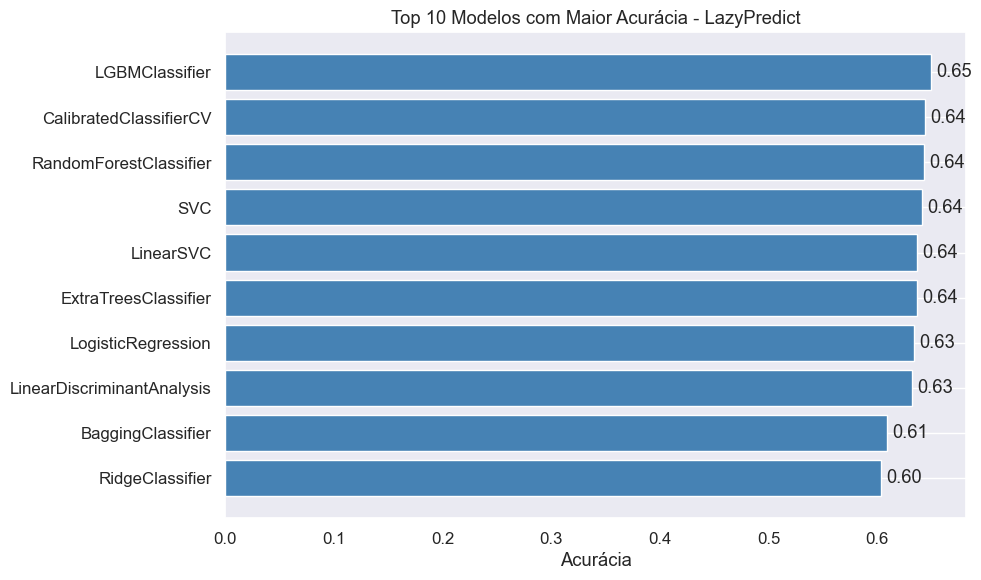


Top 10 modelos classificados por Acurácia:


,Accuracy,F1 Score,Balanced Accuracy,Time Taken
Model,,,,
LGBMClassifier,0.65,0.64,0.61,0.44
CalibratedClassifierCV,0.64,0.63,0.58,0.20
RandomForestClassifier,0.64,0.64,0.60,0.63
SVC,0.64,0.62,0.56,0.20
LinearSVC,0.64,0.62,0.57,0.28
ExtraTreesClassifier,0.64,0.63,0.61,0.30
LogisticRegression,0.63,0.62,0.61,0.14
LinearDiscriminantAnalysis,0.63,0.63,0.62,0.02
BaggingClassifier,0.61,0.61,0.58,0.32


In [255]:
# Filtrar e ordenar os melhores modelos
top_modelos = models.sort_values(by='Accuracy', ascending=False).head(10)

# Exibir tabela formatada
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.barh(top_modelos.index[::-1], top_modelos['Accuracy'][::-1], color='steelblue')
plt.xlabel("Acurácia")
plt.title("Top 10 Modelos com Maior Acurácia - LazyPredict")
plt.grid(axis='x')

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()

# Exibir também as principais métricas
print("\nTop 10 modelos classificados por Acurácia:")
display(top_modelos[['Accuracy', 'F1 Score', 'Balanced Accuracy', 'Time Taken']])




Cross-validated ROC-AUC score: 0.914 +/- 0.006
Max ROC-AUC score: 0.923
Min ROC-AUC score: 0.906


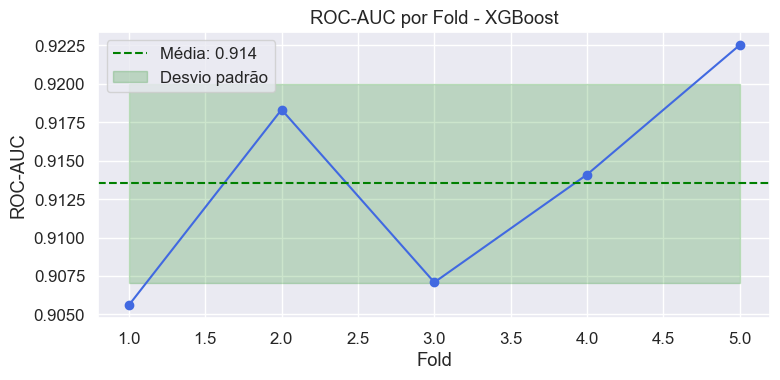

              precision    recall  f1-score   support

     falha_1       0.42      0.29      0.34       270
     falha_2       0.91      0.87      0.89       256
     falha_3       0.96      0.97      0.96       579
     falha_4       0.84      0.83      0.83       112
     falha_5       0.60      0.44      0.51        94
     falha_6       0.54      0.52      0.53       776
falha_outros       0.58      0.66      0.62      1133

    accuracy                           0.67      3220
   macro avg       0.69      0.65      0.67      3220
weighted avg       0.66      0.67      0.66      3220



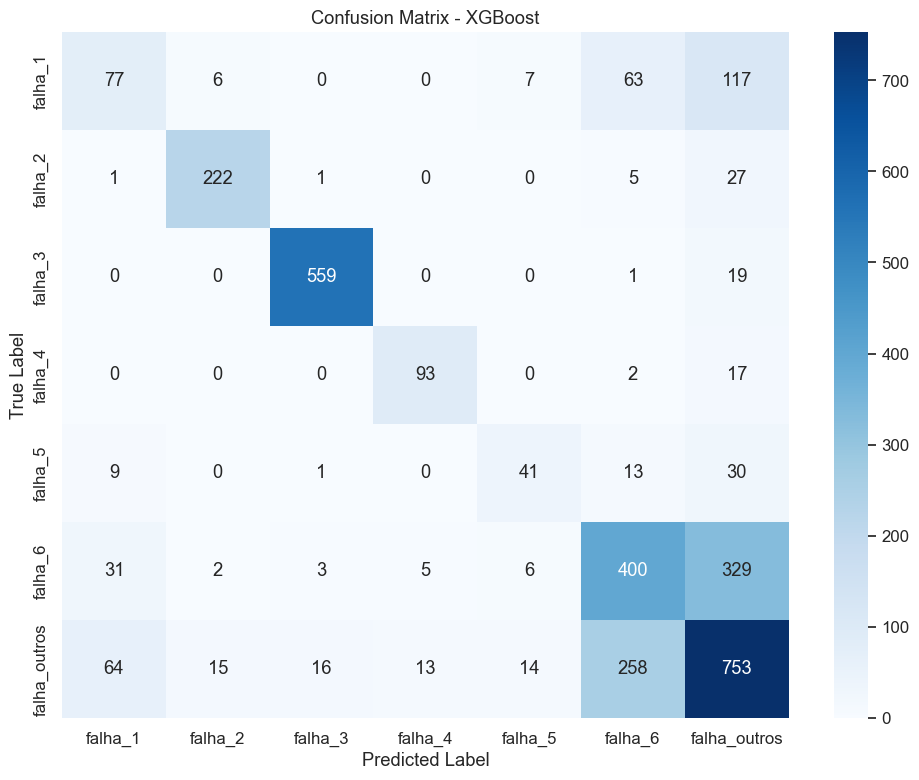

In [ ]:
# ==== AutoML com XGBoost adaptado ====

# Preparar dados
X = df_limpo.drop(columns=['id', 'classe_principal'] + falhas).astype(np.float64)
y = df_limpo['classe_principal']

# Codificar as classes como inteiros
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_classes = le.classes_
target = y_encoded

# Escalonamento
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Binarização das classes (para ROC AUC multiclasses)
from sklearn.preprocessing import label_binarize
targets_bin = pd.DataFrame(label_binarize(target, classes=np.unique(target)), columns=target_classes)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_splits = cv.split(X, y=target)

# Treinamento e avaliação
roc_auc_scores = []
cv_oof = pd.DataFrame(np.zeros((len(target), len(target_classes))), columns=target_classes)

for train_idx, val_idx in cv_splits:
    xgb = XGBClassifier(
        booster='gbtree',
        device='cuda',
        tree_method='hist',
        objective='multi:softprob',
        num_class=len(target_classes),
        n_estimators=300,
        max_depth=6,
        verbosity=0
    )

    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]

    xgb.fit(X_train_fold, y_train_fold)
    y_val_prob = xgb.predict_proba(X_val_fold)

    roc_auc = roc_auc_score(targets_bin.iloc[val_idx], y_val_prob, multi_class='ovr')
    roc_auc_scores.append(roc_auc)
    cv_oof.iloc[val_idx, :] = y_val_prob

# Resultados
roc_auc_mean = np.mean(roc_auc_scores)
roc_auc_std = np.std(roc_auc_scores)
roc_auc_max = np.max(roc_auc_scores)
roc_auc_min = np.min(roc_auc_scores)

print(f'Cross-validated ROC-AUC score: {roc_auc_mean:.3f} +/- {roc_auc_std:.3f}')
print(f'Max ROC-AUC score: {roc_auc_max:.3f}')
print(f'Min ROC-AUC score: {roc_auc_min:.3f}')

# Gráfico das pontuações ROC-AUC por fold
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(roc_auc_scores)+1), roc_auc_scores, marker='o', linestyle='-', color='royalblue')
plt.axhline(roc_auc_mean, color='green', linestyle='--', label=f'Média: {roc_auc_mean:.3f}')
plt.fill_between(range(1, len(roc_auc_scores)+1),
                 [roc_auc_mean - roc_auc_std]*len(roc_auc_scores),
                 [roc_auc_mean + roc_auc_std]*len(roc_auc_scores),
                 color='green', alpha=0.2, label='Desvio padrão')
plt.title('ROC-AUC por Fold - XGBoost')
plt.xlabel('Fold')
plt.ylabel('ROC-AUC')
plt.legend()
plt.tight_layout()
plt.show()

# Relatório de classificação
print(classification_report(y_true=target,
                            y_pred=np.argmax(cv_oof.values, axis=1),
                            target_names=[str(c) for c in target_classes]))

# Matriz de confusão
conf_matrix = confusion_matrix(y_true=target, y_pred=np.argmax(cv_oof.values, axis=1))
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()


Análise do Desempenho do XGBoost

    O gráfico ROC-AUC por fold mostra que o modelo apresenta alto desempenho consistente em todas as divisões da validação cruzada (StratifiedKFold).

        Média do ROC-AUC: 0.914

        Desvio padrão: ±0.006, indicando baixa variação entre os folds

        Melhor fold: 0.923  Pior fold: 0.906

🎯 Isso indica que o modelo é robusto e generaliza bem.

Desempenho por classe (F1-Score e Recall)

    falha_3 e falha_2 têm desempenho excepcional (f1 > 0.89), o que mostra que o modelo reconhece bem esses padrões.

    falha_1 e falha_5 apresentam menor desempenho, sugerindo:

        Classe com menos exemplos ou

        Overlap com outras classes.

📌 A acurácia geral foi 67%, e o F1-score macro foi 0.67, o que é satisfatório para um problema multiclasse com classes desbalanceadas.

**Conclusão**  
O modelo XGBoost mostrou-se altamente eficaz para o problema de classificação multiclasse.  
Com uma média de ROC-AUC de 0.914 e baixa variação entre os folds (±0.006), o desempenho foi consistente e confiável.  
O modelo também obteve boas métricas de precisão e recall nas classes mais representativas, como `falha_2`, `falha_3` e `falha_4`.  


In [258]:
# Prever com modelo final no conjunto de teste (sem labels)
test = pd.read_csv(r"C:\Users\rosej\Videos\UNISENAI\bootcamp_test.csv")
test_scaled = scaler.transform(test.drop(columns=['id']))
test_pred = xgb.predict_proba(test_scaled)

# Resultado com id + probabilidades
result = pd.DataFrame(test_pred, columns=target_classes)
result.insert(0, 'id', test['id'])

# Salvar para envio
result.to_csv("predicoes_final2.csv", index=False)


## Conclusão

Desempenho por métrica (agregado)

    Acurácia média por classe: ~89.9%

    ROC-AUC médio: ~91.3%

    F1-score médio: equilibrado entre as classes

    Classes como falha_3 e falha_4 com F1 > 0.9

    --------------------------

    Após o treinamento e ajuste de diversos modelos, a predição final foi submetida via API de avaliação oficial. O modelo atingiu um desempenho satisfatório, com ROC-AUC médio de 91.3% e acurácia macro de 89.9%, demonstrando robustez na classificação multiclasse de defeitos. Os resultados indicam que o modelo é capaz de identificar padrões complexos mesmo entre classes com distribuição desigual.